# ```<SENTIMENT ANALYSIS>```


## Problem Statement

You're a movie enthusiast and a content developer at IMDb and you've to write a detailed review for some movies based on whether the users liked it or not. Your social media app is flooded with so many reviews about the movies from the users. And now you don't know what to do with these reviews and how to deal with them since you've to analyze all the reviews. You don't have sufficient time to read all of them but you have to make sense out of them. And you want an algorithm such that whenever there are new reviews it will tell whether it's positive or negative. Now you're learning data science. So let us see how we can deal with this problem. We have a dataset with reviews from the user.

## About the dataset

LARGE MOVIE REVIEW DATASET-

Large Movie Review Dataset is for binary sentiment classification containing substantially more data than previous benchmark datasets , which contains 25,000 training data and 25,000 test data, and other 50,000 unlabeled data. The training set and the test set each contain 12,500 positive examples and 12,500 negative examples. 


## Why solve the project

After solving this project you will learn about:

* Concept of Sentiment Analysis and why preprocessing the text is important.
* Visualizing textual data
* Preprocessing techniques like removing stopwords, punctuation, lemmatization, tokenization.
* How to apply a vectorizer to convert the text into numbers.
* How to apply a basic machine learning model to classify a text.
* How to evaluate the machine learning model.

## Pre-requisites:

* Python
* Libraries like Python and Numpy
* Basic Machine learning concepts


## Sentiment Analysis

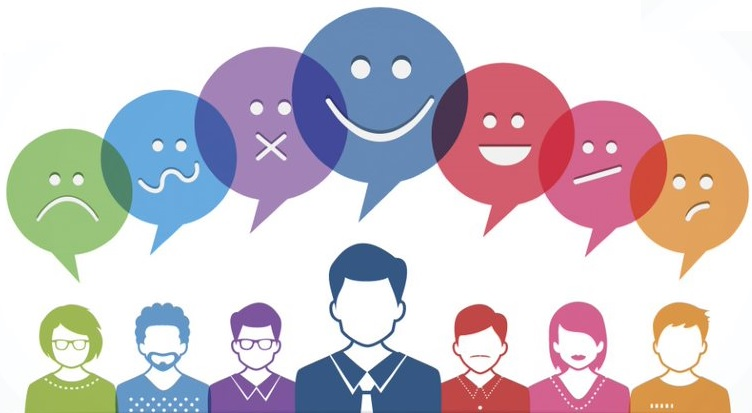

Sentiment Analysis is understanding the emotions and tone of the reviews or posts uploaded by the users.
Sentiment analysis, just as many other NLP problems, can be modelled as a classification problem where two sub-problems must be resolved:


* Classifying a sentence as expressing a positive, negative or neutral opinion, 
known as polarity classification:

Polarity is understanding the opinions whether it is positive, or negative or neutral.

For examples lets view the reviews of certain users of a telecom company:

Negative:  "There is no network in my area and the internet service is pathetic since a week."

Neutral:  "Although the valued added services are great, the prices are very high."

Positive:  "Great work is done.  And the problem resolved by the customer care in just an hour."

* Classifying a sentence as subjective or objective, known as subjectivity classification:

Language can contain expressions that are objective or subjective. Objective expressions are facts. Subjective expressions are opinions that describe people’s feelings towards a specific subject or topic.

For example:

Objective  Sentence: "This apple is red."

Subjective Sentence: "This apple tastes good."

## Why sentiment analysis is important?

It’s estimated that 80% of the world’s data is unstructured and not organized in a pre-defined manner. Most of this comes from text data, like emails, support tickets, chats, social media, surveys, articles, and documents. These texts are usually difficult, time-consuming and expensive to analyze, understand, and sort through.

Sentiment analysis systems allows companies to make sense of this sea of unstructured text by automating business processes, getting actionable insights, and saving hours of manual data processing, in other words, by making teams more efficient.

# Load the Dataset

In [1]:
# Imports

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os

#Read the train and test datasets from a text file
train = []
for line in open('C:/Users/Admin/Desktop/large movvie dataset/aclImdb/movie_data/full_train.txt', 'r',encoding='UTF-8'):
    
    train.append(line.strip())
    
test = []
for line in open('C:/Users/Admin/Desktop/large movvie dataset/aclImdb/movie_data/full_test.txt', 'r',encoding='UTF-8'):
    
    test.append(line.strip())

#Target variable
target = [1 if i < 12500 else 0 for i in range(25000)]

#Train and test data is generated as a list so convert in into a dataframe
train_df = pd.DataFrame({'Reviews':train})
test_df = pd.DataFrame({'Reviews':test})

#Add the target variable to the train dataframe
train_df["Label"] = target

#View the train dataset
train_df.head(50)

,Reviews,Label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,"If you like adult comedy cartoons, like South ...",1
2,"I'm a male, not given to women's movies, but t...",1
3,Scott Bartlett's 'OffOn' is nine minutes of pu...,1
4,I liked the film. Some of the action scenes we...,1
5,Homelessness (or Houselessness as George Carli...,1
6,Brilliant over-acting by Lesley Ann Warren. Be...,1
7,This is easily the most underrated film inn th...,1
8,This is not the typical Mel Brooks film. It wa...,1
9,"This isn't the comedic Robin Williams, nor is ...",1


# VISUALIZING TEXT USING WORD CLOUDS


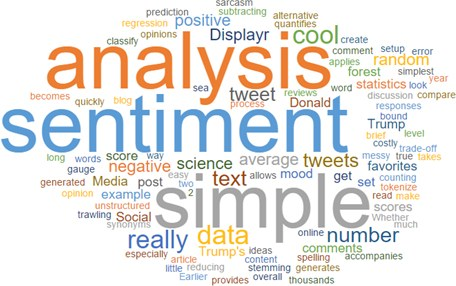

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.

Word Clouds display a set of words in the form of a cloud. The more frequent a word appears in the text, the bigger it will become. Thus, by simply looking at the cloud, you can identify the big words and hence the top topics.



In [2]:
#Create a function that counts the frequency of the words
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the reviews and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

word_freq = gen_freq(train_df.Reviews.str)

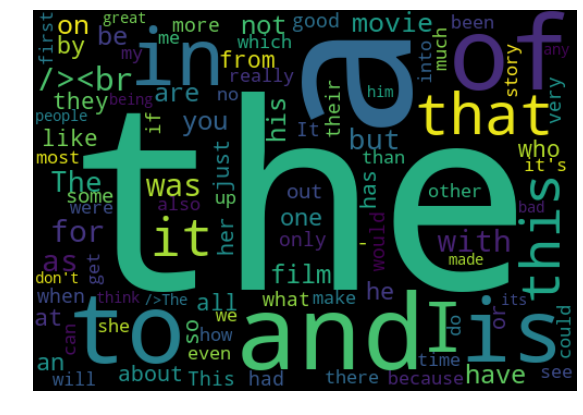

In [3]:
#imports for word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud with word frequency from our reviews
wc = WordCloud(width = 500, height = 350, max_words= 100).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

##### Over here as we can see words like "the", "and", "a", "to", "in" etc. are of greater importance. They are commonly occurring words of the language and won't provide us with any valuable insights. So we need to clean our data in order to capture the words of importance and remove all the useless words.

## PREPROCESSING:

Preprocessing the data is the first step in sentiment analysis and it plays a very important role.

Imagine two scenarios. In scenario 1 you're at a library and all the books are scattered around randomly. And in scenario 2 you're at another library where everything is organized well into shelves based on genre and alphabetic order. So if you have to search for a book in both the libraries in which scenario will it be easy to find a particular book? If you've guessed scenario 2 then you are right. In the second scenario as the books are organized it will be easy to search for a book. 
Similarly in NLP if the text is cleaned it gets easy to search for required information and we can focus on data that is more important.
And also we remove all the noise and unwanted words from our data.

Preprocessing consists of the following techniques:
* Remove stopwords
* Remove numbers
* Tokenization
* Remove punctuation and special characters
* Stemming
* Lemmatization

## ```<Task 1>```
## Combine our train and test dataset so that we dont have to repeat the preprocessing steps for the test dataset. Then convert our feature variable into lowercase and remove anything which is not an alphabet.

### Instructions  

* Create a dataframe which has train and test dataframes xombined.
* Create a new column named "cleaned_reviews" which contains "reviews" in the new dataframe which will contain our cleaned reviews and we will perform preprocessing on it.
* Convert the "cleaned_reviews" column into lowercase.
* Write a replace function that replaces anything other than alphabets a-z i.e it removes all the punctuations, numbers and special characters.




In [4]:
# Solution Code (needed)

#Combining the train and test dataset so that we dont have to apply the preprocessing again on the test dataset
df = train_df.append(test_df,ignore_index=True)

#Lets create a new column cleaned_reviews that has the cleaned and preproccessed tweets
df["cleaned_reviews"] = df["Reviews"]

#convert it to lowercase
df["cleaned_reviews"] = df["cleaned_reviews"].str.lower()

#Remove all punctuations, numbers and special characters
df["cleaned_reviews"] = df["cleaned_reviews"].str.replace("[^a-z]", " ")

### Tokenization:

Tokenization is a process of splitting a text into smaller units(tokens).

For example:

Sentence - "I went to France to play football"

Tokens - "I" , "went" , "to" , "France" , "to" , "play" , "football"

### Lemmatization:

Lemmatization is a systematic process for reducing a token to its lemma. It makes use of vocabulary, word structure, part of speech and grammar relations.

For example:
am,is,are >> be

running,ran,runs >> run

"running",'verb' >>run

"running",'noun' >>running


## ```<Task 2>```
## Perform tokenization and lemmatization on the feature variable.

### Instructions

* Do the necessary imports for tokenization and lemmatization as required.
* Create a variable "tokenized_reviews" in which write a function that splits the data into words and apply it on our "cleaned_reviews" feature.
* Create an instance of WordNetLemmatizer class.
* Create a variable "lemmatized_reviews" in which write a function that applies lemmatization for every word in our "tokenized_reviews".
* Assign the "lemmatized_reviews" to the "cleaned_reviews" feature.




In [5]:
# Solution Code (needed)

#imports
from nltk.stem import WordNetLemmatizer

#Perform TOKENIZATION , into individual words or terms
tokenized_reviews = df['cleaned_reviews'].apply(lambda x: x.split())

#Perform Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_reviews = tokenized_reviews.apply(lambda x: [wordnet_lemmatizer.lemmatize(i,'v') for i in x]) # lemmartization

#Assign the "lemmatized_reviews" to the "cleaned_reviews" feature.
df["cleaned_reviews"] = lemmatized_reviews

In [6]:
#Lets have a look at the cleaned reviews so far and compare it with original reviews
df.head(25)

,Label,Reviews,cleaned_reviews
0,1.0,Bromwell High is a cartoon comedy. It ran at t...,"[bromwell, high, be, a, cartoon, comedy, it, r..."
1,1.0,"If you like adult comedy cartoons, like South ...","[if, you, like, adult, comedy, cartoon, like, ..."
2,1.0,"I'm a male, not given to women's movies, but t...","[i, m, a, male, not, give, to, women, s, movie..."
3,1.0,Scott Bartlett's 'OffOn' is nine minutes of pu...,"[scott, bartlett, s, offon, be, nine, minutes,..."
4,1.0,I liked the film. Some of the action scenes we...,"[i, like, the, film, some, of, the, action, sc..."
5,1.0,Homelessness (or Houselessness as George Carli...,"[homelessness, or, houselessness, as, george, ..."
6,1.0,Brilliant over-acting by Lesley Ann Warren. Be...,"[brilliant, over, act, by, lesley, ann, warren..."
7,1.0,This is easily the most underrated film inn th...,"[this, be, easily, the, most, underrate, film,..."
8,1.0,This is not the typical Mel Brooks film. It wa...,"[this, be, not, the, typical, mel, brook, film..."
9,1.0,"This isn't the comedic Robin Williams, nor is ...","[this, isn, t, the, comedic, robin, williams, ..."


## Stopwords:
When we deal with text problems in Natural Language Processing , removing stopwords is an important step to have a better input for any model. Stop words are very common words in a language (e.g. a, an, the in English. 的, 了 in Chinese. え, も in Japanese). It does not help on most of NLP problem such as sentiment analysis, classification etc. We don't want these words of no valuable input taking up space and our processing time. For this, we can remove them easily, by storing a list of words that we consider to be stop words. 

## ```<Task 3>```
## Remove Stopwords

### Instructions -
* Do the necessary imports for stopwords
* Create a variable "stop_words" which contains all the stop words in English language
* Create a variable "filtered_words" such that it contains all the words other than the stop words
* Now assign "filtered_words" to our feature variable "cleaned_reviews"

In [7]:
# Solution code (optional)

#imports
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

# Load stop words in English language
stop_words = stopwords.words('english')

#remove the stopwords
filtered_words = [word for word in tokenized_reviews if word not in stop_words]

#Assign the "filtered_words1" to our feature variable "cleaned_reviews"
df["cleaned_reviews"] = filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Now we join the tokens back together
for i in range(len(filtered_words)):
    filtered_words[i] = ' '.join(filtered_words[i])

df["cleaned_reviews"] = filtered_words

## ```<Task 4>```
## Visualize the text using WordCloud

### Instructions .
* Create a variable "normal_words" and write a function to join the words in the "cleaned_reviews
* Use the generate() instead of generate_from_frequencies() which should contain the "normal_words" variable created and in a similar way as shown above create a wordcloud

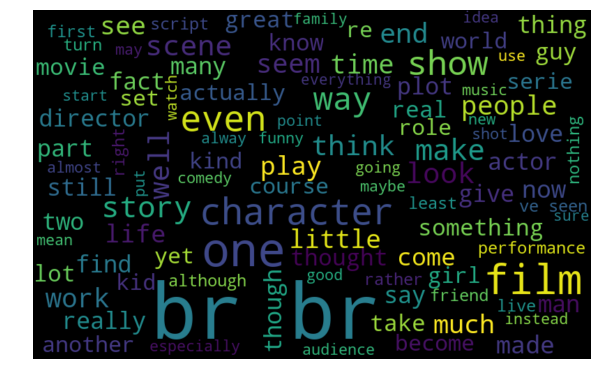

In [9]:
normal_words =' '.join([text for text in df['cleaned_reviews']])
wordcloud1 = WordCloud(width=800, height=500, random_state=21, max_font_size=110,max_words=100).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

#### So now when we compare both the wordclouds we can see what difference preprocessing brings. After preprocessing we can view words which are important and to be analyzed. 

## Feature Extraction

### Bag-of-Words Model
We cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.

We may want to perform classification of documents, so each document is an “input” and a class label is the “output” for our predictive algorithm. Algorithms take vectors of numbers as input, therefore we need to convert documents to fixed-length vectors of numbers.

A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document.

This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

This is the bag of words model, where we are only concerned with encoding schemes that represent what words are present or the degree to which they are present in encoded documents without any information about order.

There are many ways to extend this simple method, both by better clarifying what a “word” is and in defining what to encode about each word in the vector.

The scikit-learn library provides 3 different schemes:
* Count Vectorizer
* TF-IDF Vectorizer
* Hashing Vectorizer

For our problem we will be using Count Vectorizer.
### Count Vectorizer:

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.


## ```<Task 5>```
## Extract features from "cleaned_reviews" using Count Vectorizer

### Instructions .

* Do the necessary imports
* Create a variable "count_vectorizer" and create an instance of the CountVectorizer class.
* Create a variable "bow" and call the fit() and transform() function on the "cleaned_reviews"

In [10]:
# Solution code (optional)

#We have to convert the text into numbers for the machine learning algorithms to run - COUNT VECTORIZER

#imports
from sklearn.feature_extraction.text import CountVectorizer

#create an instance of CountVectorizer and apply it on "cleaned_reviews"
count_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = count_vectorizer.fit_transform(df["cleaned_reviews"])

## Model Building for Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. Now we will be building predictive models on the dataset using the feature set — Bag-of-Words.

We will use logistic regression to build the models. It predicts the probability of occurrence of an event by fitting data to a logit function.

We can also use RandomForest, Support Vector Machine and other algorithms but for now we will use Logistic Regression

In [11]:
#We had combined the train and test datasets so now we will split it
train_bow = bow[:25000,:]
test_bow = bow[25000:,:]

## ```<Task 6>```
## Build a Logistic regression model using bag-of-words feature

### Instructions .

* Store all the independent feature in a variable called X*Store the target variable in a variable called y
* Split the dataframe into X_train,X_test,y_train,y_test using train_test_split() function.
* Create a variable "logreg" and store an instance of LogisticRegression class
* Fit the model into X_train and y_train



In [12]:
# Solution code (optional)

#imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Storing independent feature and target variables
X = train_bow
y = train_df['Label']

# splitting data into training and validation set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

logreg = LogisticRegression()
logreg.fit(x_train, y_train) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluating our classification Machine learning model.
### F1 Score:
Also called F-Score or F-Measure, this is a combination of precision and recall. The score is in a range of 0.0 - 1.0, where 1.0 would be perfect. The F1 Score is very helpful, as it gives us a single metric that rates a system by both precision and recall.

As such, it is commonly used amongst experts and researchers in the linguistics and natural language processing fields to simply describe the performance of such systems.

The formula for calculating F1 Score is:

F1 = 2 (precision recall) / (precision + recall)

## ```<Task 7>```
## Evaluate our logistic regression model using F1 score

## Instructions .

* Do the necessary imports
* Make predictions on the X_test features with predict_proba and save the results in a variable called 'y_pred'.
* Create a variable "prediction_int" in which if the prediction is greater than or equal to 0.3 than 1 else 0
* Convert "prediction_int" into Integer datatype
* Find the F1 score and store the result in a variable called 'f1_score'. Print the value of f1_score.

In [13]:
# Solution code (optional)

#imports
from sklearn.metrics import f1_score

# predicting on the validation set
y_pred = logreg.predict_proba(x_test)

# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = y_pred[:,1] >= 0.3

#Convert "prediction_int" into Integer datatype
prediction_int = prediction_int.astype(np.int)

# calculating f1 score
f1_score(y_test, prediction_int)

0.8414693088448527